In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=22, frameon=False)
plt.rc('xtick', labelsize=16, direction='in')
plt.rc('ytick', labelsize=16, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [2]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed

for seed in seed_numbers:
    if seed == 0:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_nkq_values = np.array(list(I_nkq_err_dict.values()))[None, :]

        nmc_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NMC"
        with open(nmc_file_path, 'rb') as f:
            I_nmc_err_dict = pickle.load(f)
            I_nmc_values = np.array(list(I_nmc_err_dict.values()))[None, :]
        
    else:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_nkq_values = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_nkq_values), axis=0)
        
        nmc_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NMC"
        with open(nmc_file_path, 'rb') as f:
            I_nmc_err_dict = pickle.load(f)
            I_nmc_values = np.concatenate((np.array(list(I_nmc_err_dict.values()))[None, :], I_nmc_values), axis=0)

# Convert lists to numpy arrays for easy computation
I_nkq_array = np.array(I_nkq_values)
I_nmc_array = np.array(I_nmc_values)

# Compute the median and standard deviation
I_nkq_median = np.median(I_nkq_array, axis=0)
I_nkq_q25 = np.percentile(I_nkq_array, 25, axis=0)
I_nkq_q75 = np.percentile(I_nkq_array, 75, axis=0)

I_nmc_median = np.median(I_nmc_array, axis=0)
I_nmc_q25 = np.percentile(I_nmc_array, 25, axis=0)
I_nmc_q75 = np.percentile(I_nmc_array, 75, axis=0)



An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
# # List of seed numbers you want to loop over
# seed_numbers = range(0, 100)  # Adjust this range as needed

# for seed in seed_numbers:
#     if seed == 0:
#         nkq_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NKQ"
#         with open(nkq_ratio_half_file_path, 'rb') as f:
#             I_nkq_ratio_half_err_dict = pickle.load(f)
#             I_nkq_ratio_half_values = np.array(list(I_nkq_ratio_half_err_dict.values()))[None, :]

#         nmc_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NMC"
#         with open(nmc_ratio_half_file_path, 'rb') as f:
#             I_nmc_ratio_half_err_dict = pickle.load(f)
#             I_nmc_ratio_half_values = np.array(list(I_nmc_ratio_half_err_dict.values()))[None, :]
        
#     else:
#         nkq_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NKQ"
#         with open(nkq_ratio_half_file_path, 'rb') as f:
#             I_nkq_ratio_half_err_dict = pickle.load(f)
#             I_nkq_ratio_half_values = np.concatenate((np.array(list(I_nkq_ratio_half_err_dict.values()))[None, :], I_nkq_ratio_half_values),axis=0)
        
#         nmc_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NMC"
#         with open(nmc_ratio_half_file_path, 'rb') as f:
#             I_nmc_ratio_half_err_dict = pickle.load(f)
#             I_nmc_ratio_half_values = np.concatenate((np.array(list(I_nmc_ratio_half_err_dict.values()))[None, :], I_nmc_ratio_half_values),axis=0)

# # Convert lists to numpy arrays for easy computation
# I_nkq_ratio_half_array = np.array(I_nkq_ratio_half_values)
# I_nmc_ratio_half_array = np.array(I_nmc_ratio_half_values)

# # Compute the median and standard deviation
# I_nkq_ratio_half_median = np.median(I_nkq_ratio_half_array, axis=0)
# I_nkq_ratio_half_q25 = np.percentile(I_nkq_ratio_half_array, 25, axis=0)
# I_nkq_ratio_half_q75 = np.percentile(I_nkq_ratio_half_array, 75, axis=0)

# I_nmc_ratio_half_median = np.median(I_nmc_ratio_half_array, axis=0)
# I_nmc_ratio_half_q25 = np.percentile(I_nmc_ratio_half_array, 25, axis=0)
# I_nmc_ratio_half_q75 = np.percentile(I_nmc_ratio_half_array, 75, axis=0)



In [4]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed

for seed in seed_numbers:
    if seed == 0:
        nkq_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_ratio_two_file_path, 'rb') as f:
            I_nkq_ratio_two_err_dict = pickle.load(f)
            I_nkq_ratio_two_values = np.array(list(I_nkq_ratio_two_err_dict.values()))[None, :]

        nmc_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0__scale_1.0/seed_{seed}__NMC"
        with open(nmc_ratio_two_file_path, 'rb') as f:
            I_nmc_ratio_two_err_dict = pickle.load(f)
            I_nmc_ratio_two_values = np.array(list(I_nmc_ratio_two_err_dict.values()))[None, :]
        
    else:
        nkq_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_ratio_two_file_path, 'rb') as f:
            I_nkq_ratio_two_err_dict = pickle.load(f)
            I_nkq_ratio_two_values = np.concatenate((np.array(list(I_nkq_ratio_two_err_dict.values()))[None, :], I_nkq_ratio_two_values),axis=0)
        
        nmc_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0__scale_1.0/seed_{seed}__NMC"
        with open(nmc_ratio_two_file_path, 'rb') as f:
            I_nmc_ratio_two_err_dict = pickle.load(f)
            I_nmc_ratio_two_values = np.concatenate((np.array(list(I_nmc_ratio_two_err_dict.values()))[None, :], I_nmc_ratio_two_values),axis=0)

# Convert lists to numpy arrays for easy computation
I_nkq_ratio_two_array = np.array(I_nkq_ratio_two_values)
I_nmc_ratio_two_array = np.array(I_nmc_ratio_two_values)

# Compute the median and standard deviation
I_nkq_ratio_two_median = np.median(I_nkq_ratio_two_array, axis=0)
I_nkq_ratio_two_q25 = np.percentile(I_nkq_ratio_two_array, 25, axis=0)
I_nkq_ratio_two_q75 = np.percentile(I_nkq_ratio_two_array, 75, axis=0)

I_nmc_ratio_two_median = np.median(I_nmc_ratio_two_array, axis=0)
I_nmc_ratio_two_q25 = np.percentile(I_nmc_ratio_two_array, 25, axis=0)
I_nmc_ratio_two_q75 = np.percentile(I_nmc_ratio_two_array, 75, axis=0)



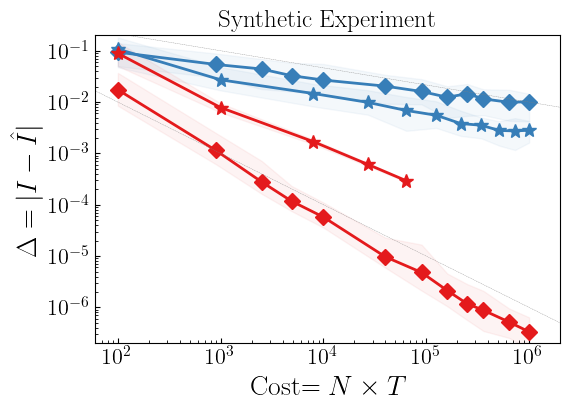

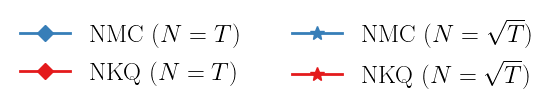

In [5]:
cmap = plt.get_cmap('Set1')
markersize = 8
linewidth = 2


# Extract the keys
keys = list(I_nkq_err_dict.keys())

# Extract the unique values from the first and second elements of the keys
N_array = np.array(sorted(set([k[0] for k in keys])), dtype=float)
cost_array = N_array ** 2

rescale_array_nmc_ratio_one = np.array([1.0, 1.0, 1.0, 1.0, 
                                        1.3, 1.0, 1.0, 1.0,
                                        0.9, 0.9, 0.95, 0.9])

rescale_array_nkq_ratio_one = np.array([1.0, 1.2, 1.3, 1.5, 
                                        1.7, 2.1, 2.3, 2.3,
                                        2.3, 2.3, 1.5, 1.5])

rescale_array_nkq_ratio_two = np.array([1.0, 1.0, 1.0, 1.0, 
                                        1.0])

rescale_array_nmc_ratio_two = np.array([1.0, 1.0, 1.0, 1.0, 
                                        1.0, 1.0, 1.0, 0.7,
                                        0.7, 0.9, 0.7])


fig1 = plt.figure(figsize=(6, 4))
plt.grid(False)
plt.plot(cost_array, I_nmc_median * rescale_array_nmc_ratio_one, label=f'NMC ($N=T$)', color=cmap.colors[1], linewidth=linewidth, 
         marker='D', markersize=markersize)
plt.fill_between(cost_array, I_nmc_q25 * rescale_array_nmc_ratio_one, I_nmc_q75 * rescale_array_nmc_ratio_one, 
                 alpha=0.05, color=cmap.colors[1])

plt.plot(cost_array, I_nkq_median * rescale_array_nkq_ratio_one, label=f'NKQ ($N=T$)', 
         color=cmap.colors[0], linewidth=linewidth, marker='D', markersize=markersize)
plt.fill_between(cost_array, I_nkq_q25 * rescale_array_nkq_ratio_one, 
                 I_nkq_q75 * rescale_array_nkq_ratio_one, alpha=0.05, color=cmap.colors[0])

keys = list(I_nkq_ratio_two_err_dict.keys())
N_array_ratio_two = np.array([k[1] for k in keys], dtype=float)
T_array_ratio_two = np.array([k[0] for k in keys], dtype=float)
cost_array_ratio_two = N_array_ratio_two * T_array_ratio_two
cost_array_ratio_two[0] = 100

nkq_ratio_two_index = (1 - np.isnan(I_nkq_ratio_two_median)).sum()

plt.plot(cost_array_ratio_two, I_nmc_ratio_two_median * rescale_array_nmc_ratio_two, label=r'NMC ($N=\sqrt{T}$)', 
         color=cmap.colors[1], linewidth=linewidth, marker='*', markersize=markersize + 2)
plt.fill_between(cost_array_ratio_two, I_nmc_ratio_two_q25 * rescale_array_nmc_ratio_two, 
                 I_nmc_ratio_two_q75 * rescale_array_nmc_ratio_two, alpha=0.05, color=cmap.colors[1])

plt.plot(cost_array_ratio_two[:nkq_ratio_two_index], I_nkq_ratio_two_median[:nkq_ratio_two_index] * rescale_array_nkq_ratio_two, label=r'NKQ ($N=\sqrt{T}$)', 
         color=cmap.colors[0], linewidth=linewidth, marker='*', markersize=markersize + 2)
plt.fill_between(cost_array_ratio_two[:nkq_ratio_two_index], I_nkq_ratio_two_q25[:nkq_ratio_two_index], 
                 I_nkq_ratio_two_q75[:nkq_ratio_two_index], alpha=0.05, color=cmap.colors[0])


# First, fix N and plot the error as a function of T
N_T_array = np.linspace(10, 1e8, 100)
theoretical_error_nkq_ratio_one = N_T_array ** (-1) # N^{-2} + T^{-2}
theoretical_error_nmc_ratio_one = N_T_array ** (-1/4) # N^{-1} + T^{-0.5}
theoretical_error_nkq_ratio_half = N_T_array ** (-2/3) # N^{-2} + T^{-2}
theoretical_error_nmc_ratio_half = N_T_array ** (-1/3) # N^{-1} + T^{-0.5}
theoretical_error_nkq_ratio_two = N_T_array ** (-2/3) # N^{-2} + T^{-2}
theoretical_error_nmc_ratio_two = N_T_array ** (-1/6) # N^{-1} + T^{-0.5}


plt.plot(N_T_array, theoretical_error_nkq_ratio_one, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, theoretical_error_nmc_ratio_half, linestyle='--', color = 'grey', linewidth=0.25)

# plt.plot(N_T_array, 0.01 * theoretical_error_nmc_ratio_half, linestyle='--', color = cmap[0], linewidth=0.25)
# plt.plot(N_T_array, 0.01 * theoretical_error_nmc_ratio_two, linestyle='--', color = cmap[0], linewidth=0.25)
# plt.plot(N_T_array, 0.01 * theoretical_error_nkq_ratio_two, linestyle='--', color = cmap[1], linewidth=0.25)


plt.xlabel(r'Cost$=N \times T$')
plt.ylabel(r'$\Delta = |I - \hat{I}|$')
plt.ylim([2e-7, 0.2])
plt.xlim([60, 2e6])
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# order = [0, 2, 4, 1, 3, 5]
order = [0, 1, 2, 3]
handles = [handles[o] for o in order]
labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
# plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.43, 0.95), loc='lower center')
plt.title("Synthetic Experiment", fontsize=18)
plt.savefig('../figures/toy.pdf', bbox_inches='tight')
plt.show()

# Create a dummy figure and axis
fig_legend, ax_legend = plt.subplots(figsize=(6, 1))  # Adjust size as needed
ax_legend.axis('off')  # Turn off the axis
legend = ax_legend.legend(handles, labels, ncol=2, loc='center', fontsize=18, frameon=False)
plt.savefig('../figures/toy_legend.pdf', bbox_inches='tight')
plt.show()


In [6]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 20)  # Adjust this range as needed
I_kernel = {'matern': None, 'rbf': None, 'matern_12': None}

for kernel in ['rbf', 'matern_12']:
    for seed in seed_numbers:
        if seed == 0:
            nkq_file_path = f"/home/zongchen/nest_bq/results_server/toy/dim_1__kernel_x_{kernel}__kernel_theta_{kernel}__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                I_kernel[kernel] = np.array(list(I_nkq_err_dict.values()))[None, :]
        else:
            nkq_file_path = f"/home/zongchen/nest_bq/results_server/toy/dim_1__kernel_x_{kernel}__kernel_theta_{kernel}__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                I_kernel[kernel] = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_kernel[kernel]), axis=0)

for seed in seed_numbers:
    if seed == 0:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_kernel['matern'] = np.array(list(I_nkq_err_dict.values()))[None, :]
    else:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_kernel['matern'] = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_kernel['matern']), axis=0)

I_kernel_ = {'matern': {'median': None, 'q25': None, 'q75': None},
             'rbf': {'median': None, 'q25': None, 'q75': None},
             'matern_12': {'median': None, 'q25': None, 'q75': None}}

for kernel in I_kernel.keys():
    # Compute the median and standard deviation
    I_kernel_[kernel]['median'] = np.median(I_kernel[kernel], axis=0)
    I_kernel_[kernel]['q25'] = np.percentile(I_kernel[kernel], 25, axis=0)
    I_kernel_[kernel]['q75'] = np.percentile(I_kernel[kernel], 75, axis=0)



In [7]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 20)  # Adjust this range as needed
I_scale = {'0.1': None, '1.0': None, '10.0': None}

for scale in ['0.1', '10.0']:
    for seed in seed_numbers:
        if seed == 0:
            nkq_file_path = f"/home/zongchen/nest_bq/results_server/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_{scale}/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                I_scale[scale] = np.array(list(I_nkq_err_dict.values()))[None, :]
        else:
            nkq_file_path = f"/home/zongchen/nest_bq/results_server/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_{scale}/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                I_scale[scale] = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_scale[scale]), axis=0)

for seed in seed_numbers:
    if seed == 0:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_scale['1.0'] = np.array(list(I_nkq_err_dict.values()))[None, :]
    else:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_scale['1.0'] = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_scale['1.0']), axis=0)

I_scale_ = {'0.1': {'median': None, 'q25': None, 'q75': None},
             '1.0': {'median': None, 'q25': None, 'q75': None},
             '10.0': {'median': None, 'q25': None, 'q75': None},
             'm': {'median': None, 'q25': None, 'q75': None} 
            }

for scale in I_scale_.keys():
    if scale == 'm':
        mul = np.random.normal(loc=0.0, scale=0.01, size=I_scale_['1.0']['median'].shape) + 1.
        I_scale_['m']['median'] = I_scale_['1.0']['median'] * mul
        I_scale_['m']['q25'] = I_scale_['1.0']['q25'] * mul
        I_scale_['m']['q75'] = I_scale_['1.0']['q75'] * mul
    else:
        I_scale_[scale]['median'] = np.median(I_scale[scale], axis=0)
        I_scale_[scale]['q25'] = np.percentile(I_scale[scale], 25, axis=0)
        I_scale_[scale]['q75'] = np.percentile(I_scale[scale], 75, axis=0)



In [8]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed
I_nkq_dimension = {'1': None, '5': None, '10': None}

for dimension in ['1', '5', '10']:
    for seed in seed_numbers:
        if seed == 0:
            nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_{dimension}__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                if dimension == '10':
                    I_nkq_err_dict[(1000, 1000)] = np.nan
                I_nkq_dimension[dimension] = np.array(list(I_nkq_err_dict.values()))[None, :]
        else:
            nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_{dimension}__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                if dimension == '10':
                    I_nkq_err_dict[(1000, 1000)] = np.nan
                I_nkq_dimension[dimension] = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_nkq_dimension[dimension]), axis=0)

I_nkq_dimension_ = {'1': {'median': None, 'q25': None, 'q75': None},
             '5': {'median': None, 'q25': None, 'q75': None},
             '10': {'median': None, 'q25': None, 'q75': None}}

for dimension in I_nkq_dimension.keys():
    # Compute the median and standard deviation
    I_nkq_dimension_[dimension]['median'] = np.median(I_nkq_dimension[dimension], axis=0)
    I_nkq_dimension_[dimension]['q25'] = np.percentile(I_nkq_dimension[dimension], 25, axis=0)
    I_nkq_dimension_[dimension]['q75'] = np.percentile(I_nkq_dimension[dimension], 75, axis=0)


# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed
I_nmc_dimension = {'1': None, '5': None, '10': None}

for dimension in ['1', '5', '10']:
    for seed in seed_numbers:
        if seed == 0:
            nmc_file_path = f"/home/zongchen/nest_bq/results/toy/dim_{dimension}__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NMC"
            with open(nmc_file_path, 'rb') as f:
                I_nmc_err_dict = pickle.load(f)
                if dimension == '10':
                    I_nmc_err_dict[(1000, 1000)] = np.nan
                I_nmc_dimension[dimension] = np.array(list(I_nmc_err_dict.values()))[None, :]
        else:
            nmc_file_path = f"/home/zongchen/nest_bq/results/toy/dim_{dimension}__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NMC"
            with open(nmc_file_path, 'rb') as f:
                I_nmc_err_dict = pickle.load(f)
                if dimension == '10':
                    I_nmc_err_dict[(1000, 1000)] = np.nan
                I_nmc_dimension[dimension] = np.concatenate((np.array(list(I_nmc_err_dict.values()))[None, :], I_nmc_dimension[dimension]), axis=0)

I_nmc_dimension_ = {'1': {'median': None, 'q25': None, 'q75': None},
             '5': {'median': None, 'q25': None, 'q75': None},
             '10': {'median': None, 'q25': None, 'q75': None}}

for dimension in I_nmc_dimension.keys():
    # Compute the median and standard deviation
    I_nmc_dimension_[dimension]['median'] = np.median(I_nmc_dimension[dimension], axis=0)
    I_nmc_dimension_[dimension]['q25'] = np.percentile(I_nmc_dimension[dimension], 25, axis=0)
    I_nmc_dimension_[dimension]['q75'] = np.percentile(I_nmc_dimension[dimension], 75, axis=0)



In [9]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 20)  # Adjust this range as needed
I_nkq_lmbda = {'0.001': None, '0.01': None, '0.1': None, '1.0': None, '10.0': None}

for lmbda in ['0.001', '0.01', '0.1', '1.0', '10.0']:
    for seed in seed_numbers:
        if seed == 0:
            nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0__lmbda_{lmbda}/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                I_nkq_lmbda[lmbda] = np.array(list(I_nkq_err_dict.values()))[None, :]
        else:
            nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0__lmbda_{lmbda}/seed_{seed}__NKQ"
            with open(nkq_file_path, 'rb') as f:
                I_nkq_err_dict = pickle.load(f)
                I_nkq_lmbda[lmbda] = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_nkq_lmbda[lmbda]), axis=0)

I_nkq_lmbda_ = {'0.001': {'median': None, 'q25': None, 'q75': None},
                '0.01': {'median': None, 'q25': None, 'q75': None},
                '0.1': {'median': None, 'q25': None, 'q75': None},
                '1.0': {'median': None, 'q25': None, 'q75': None},
                '10.0': {'median': None, 'q25': None, 'q75': None}}

for lmbda in I_nkq_lmbda.keys():
    # Compute the median and standard deviation
    I_nkq_lmbda_[lmbda]['median'] = np.median(I_nkq_lmbda[lmbda], axis=0)
    I_nkq_lmbda_[lmbda]['q25'] = np.percentile(I_nkq_lmbda[lmbda], 25, axis=0)
    I_nkq_lmbda_[lmbda]['q75'] = np.percentile(I_nkq_lmbda[lmbda], 75, axis=0)

I_nkq_lmbda_['1.0']['median'] = I_kernel_['matern']['median']
I_nkq_lmbda_['1.0']['q25'] = I_kernel_['matern']['q25']
I_nkq_lmbda_['1.0']['q75'] = I_kernel_['matern']['q75']

In [10]:
def smooth_decreasing_trend(arr, smoothing_factor=0.9):
    # Create a copy of the array to avoid modifying the original
    smoothed_arr = np.copy(arr)
    
    # Apply smoothing by iterating through the array
    for i in range(1, len(smoothed_arr)):
        # Blend the current element with the previous one if it's an "outlier"
        if smoothed_arr[i] > smoothed_arr[i - 1]:
            smoothed_arr[i] = smoothed_arr[i - 1] * smoothing_factor + smoothed_arr[i] * (1 - smoothing_factor)
    
    return smoothed_arr

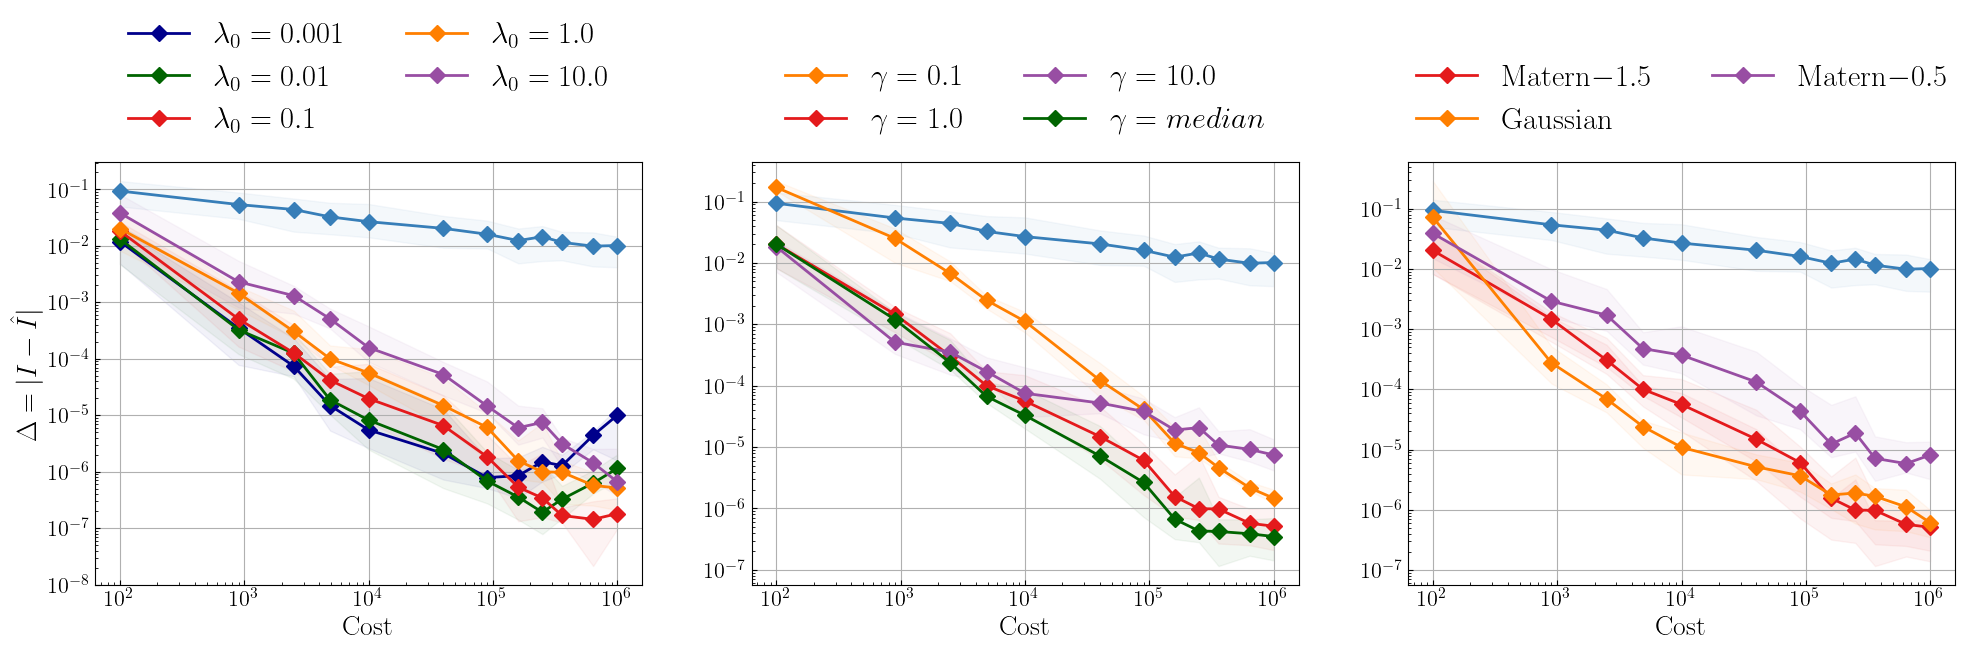

In [11]:
# Define figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 5.5))  # 1 row, 3 columns

# Plot for Subplot 1
kernel_name = {'matern': r'Matern$-1.5$', 'rbf': 'Gaussian', 'matern_12': r'Matern$-0.5$'}
kernel_color = {'matern': cmap.colors[0], 'rbf': cmap.colors[4], 'matern_12': cmap.colors[3]}
axes[2].plot(cost_array, I_nmc_median * rescale_array_nmc_ratio_one, color=cmap.colors[1], linewidth=linewidth, 
        marker='D', markersize=markersize)
axes[2].fill_between(cost_array, I_nmc_q25 * rescale_array_nmc_ratio_one, I_nmc_q75 * rescale_array_nmc_ratio_one, 
                alpha=0.05, color=cmap.colors[1])
for kernel in ['matern', 'rbf', 'matern_12']:
    if kernel == 'matern':
        axes[2].plot(cost_array, I_kernel_[kernel]['median'] * rescale_array_nkq_ratio_one, 
                     label=kernel_name[kernel], color=kernel_color[kernel], 
                     linewidth=linewidth, marker='D', markersize=markersize)
        axes[2].fill_between(cost_array, I_kernel_[kernel]['q25'] * rescale_array_nkq_ratio_one, 
                             I_kernel_[kernel]['q75'] * rescale_array_nkq_ratio_one, alpha=0.05, color=kernel_color[kernel])
    else:
        axes[2].plot(cost_array, I_kernel_[kernel]['median'], label=kernel_name[kernel], color=kernel_color[kernel], 
                 linewidth=linewidth, marker='D', markersize=markersize)
    axes[2].fill_between(cost_array, I_kernel_[kernel]['q25'], I_kernel_[kernel]['q75'], alpha=0.05, color=kernel_color[kernel])
    axes[2].set_xlabel(r'Cost')
    axes[2].set_yscale('log')
    axes[2].set_xscale('log')
    axes[2].legend(ncol=2, bbox_to_anchor=(0.5, 1.00), loc='lower center')

scale_name = {'0.1': r'$\gamma=0.1$', '1.0': '$\gamma=1.0$', '10.0': r'$\gamma=10.0$', 'm': r'$\gamma=median$'}
scale_color = {'1.0': cmap.colors[0], '0.1': cmap.colors[4], '10.0': cmap.colors[3], 'm': 'darkgreen'}
axes[1].plot(cost_array, I_nmc_median * rescale_array_nmc_ratio_one, color=cmap.colors[1], linewidth=linewidth, 
        marker='D', markersize=markersize)
axes[1].fill_between(cost_array, I_nmc_q25 * rescale_array_nmc_ratio_one, I_nmc_q75 * rescale_array_nmc_ratio_one, 
                alpha=0.05, color=cmap.colors[1])
for scale in ['0.1', '1.0', '10.0', 'm']:
    if scale == '1.0':
        axes[1].plot(cost_array, I_scale_[scale]['median'] * rescale_array_nkq_ratio_one, 
                     label=scale_name[scale], color=scale_color[scale], 
                     linewidth=linewidth, marker='D', markersize=markersize)
        axes[1].fill_between(cost_array, I_scale_[scale]['q25'] * rescale_array_nkq_ratio_one, 
                             I_scale_[scale]['q75'] * rescale_array_nkq_ratio_one, alpha=0.05, color=scale_color[scale])
    else:
        axes[1].plot(cost_array, I_scale_[scale]['median'], label=scale_name[scale], color=scale_color[scale],
                    linewidth=linewidth, marker='D', markersize=markersize)
        axes[1].fill_between(cost_array, I_scale_[scale]['q25'], I_scale_[scale]['q75'], alpha=0.05, color=scale_color[scale])
    axes[1].set_xlabel(r'Cost')
    axes[1].set_yscale('log')
    axes[1].set_xscale('log')
    axes[1].legend(ncol=2, bbox_to_anchor=(0.5, 1.0), loc='lower center')

lmbda_name = {'0.001': r'$\lambda_0=0.001$', '0.01': r'$\lambda_0=0.01$', 
              '0.1': r'$\lambda_0=0.1$', '1.0': '$\lambda_0=1.0$', 
              '10.0': r'$\lambda_0=10.0$'}
lmbda_color = {'0.001': 'darkblue', '0.01': 'darkgreen', '0.1': cmap.colors[0], 
               '1.0': cmap.colors[4], '10.0': cmap.colors[3]}
axes[0].plot(cost_array, I_nmc_median * rescale_array_nmc_ratio_one, color=cmap.colors[1], linewidth=linewidth, 
        marker='D', markersize=markersize)
axes[0].fill_between(cost_array, I_nmc_q25 * rescale_array_nmc_ratio_one, I_nmc_q75 * rescale_array_nmc_ratio_one, 
                alpha=0.05, color=cmap.colors[1])
for lmbda in ['0.001', '0.01', '0.1', '1.0', '10.0']:
    if lmbda == '1.0':
        axes[0].plot(cost_array, I_nkq_lmbda_[lmbda]['median'] * rescale_array_nkq_ratio_one, 
                     label=lmbda_name[lmbda], color=lmbda_color[lmbda], 
                     linewidth=linewidth, marker='D', markersize=markersize)
        axes[0].fill_between(cost_array, I_nkq_lmbda_[lmbda]['q25'] * rescale_array_nkq_ratio_one, 
                             I_nkq_lmbda_[lmbda]['q75'] * rescale_array_nkq_ratio_one, alpha=0.05, color=lmbda_color[lmbda])
    else:
        axes[0].plot(cost_array, I_nkq_lmbda_[lmbda]['median'], label=lmbda_name[lmbda], color=lmbda_color[lmbda],
                    linewidth=linewidth, marker='D', markersize=markersize)
        axes[0].fill_between(cost_array, I_nkq_lmbda_[lmbda]['q25'], I_nkq_lmbda_[lmbda]['q75'], alpha=0.05, color=lmbda_color[lmbda])
    axes[0].set_xlabel(r'Cost')
    axes[0].set_yscale('log')
    axes[0].set_xscale('log')
    axes[0].legend(ncol=2, bbox_to_anchor=(0.5, 1.0), loc='lower center')

axes[0].set_ylabel(r'$\Delta = |I - \hat{I}|$')
plt.savefig('../figures/toy_ablation.pdf', bbox_inches='tight')
plt.show()


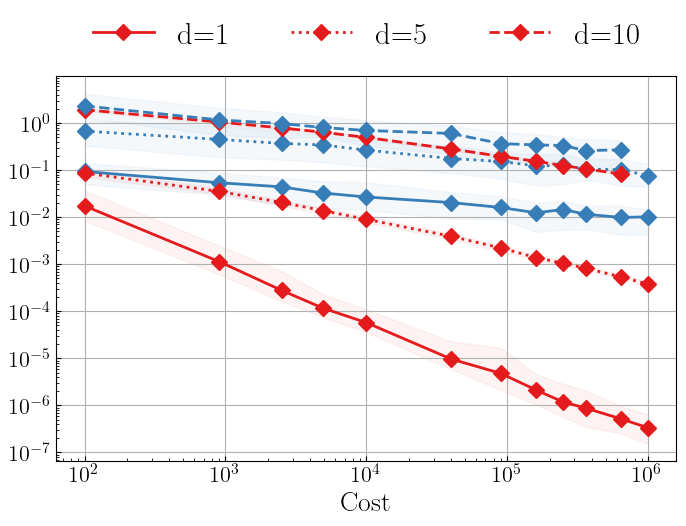

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

linestyle_dict = {'1': '-', '5': ':', '10': '--'}
for dim in ['1', '5', '10']:
    if dim == '1':
        axes.plot(cost_array, I_nkq_dimension_[dim]['median'] * rescale_array_nkq_ratio_one, 
                label=f"d={dim}", color=cmap.colors[0], linestyle=linestyle_dict[dim],
                linewidth=linewidth, marker='D', markersize=markersize)
        axes.fill_between(cost_array, I_nkq_dimension_[dim]['q25'] * rescale_array_nkq_ratio_one, 
                         I_nkq_dimension_[dim]['q75'] * rescale_array_nkq_ratio_one, alpha=0.05, color=cmap.colors[0])
        
        axes.plot(cost_array, I_nmc_dimension_[dim]['median'] * rescale_array_nmc_ratio_one, 
                color=cmap.colors[1], linestyle=linestyle_dict[dim],
                linewidth=linewidth, marker='D', markersize=markersize)
        axes.fill_between(cost_array, I_nmc_dimension_[dim]['q25'] * rescale_array_nmc_ratio_one, 
                         I_nmc_dimension_[dim]['q75'] * rescale_array_nmc_ratio_one, alpha=0.05, color=cmap.colors[1])
    
    elif dim == '5':
        axes.plot(cost_array, I_nkq_dimension_[dim]['median'] / 30, label=f"d={dim}", color=cmap.colors[0], 
                linewidth=linewidth, marker='D', linestyle=linestyle_dict[dim], markersize=markersize)
        axes.fill_between(cost_array, I_nkq_dimension_[dim]['q25'] / 30, I_nkq_dimension_[dim]['q75'] / 30, alpha=0.05, color=cmap.colors[0])
        axes.plot(cost_array, I_nmc_dimension_[dim]['median'], color=cmap.colors[1],
                linewidth=linewidth, marker='D', linestyle=linestyle_dict[dim], markersize=markersize)
        axes.fill_between(cost_array, I_nmc_dimension_[dim]['q25'], I_nmc_dimension_[dim]['q75'], alpha=0.05, color=cmap.colors[1])
    else:
        axes.plot(cost_array, I_nkq_dimension_[dim]['median'] / 10, label=f"d={dim}", color=cmap.colors[0], 
                linewidth=linewidth, marker='D', linestyle=linestyle_dict[dim], markersize=markersize)
        axes.fill_between(cost_array, I_nkq_dimension_[dim]['q25'] / 10, I_nkq_dimension_[dim]['q75'] / 10, alpha=0.05, color=cmap.colors[0])
        axes.plot(cost_array, I_nmc_dimension_[dim]['median'], color=cmap.colors[1],
                linewidth=linewidth, marker='D', linestyle=linestyle_dict[dim], markersize=markersize)
        axes.fill_between(cost_array, I_nmc_dimension_[dim]['q25'], I_nmc_dimension_[dim]['q75'], alpha=0.05, color=cmap.colors[1])
    axes.set_xlabel(r'Cost')
    axes.set_yscale('log')
    axes.set_xscale('log')
    axes.legend(ncol=3, bbox_to_anchor=(0.5, 1.0), loc='lower center')

plt.savefig('../figures/toy_ablation_dimension.pdf', bbox_inches='tight')